In [ ]:
%load_ext watermark
%watermark  -d -u -a 'Andreas Mueller, Kyle Kastner, Sebastian Raschka' -v -p numpy,scipy,matplotlib

The use of watermark (above) is optional, and we use it to keep track of the changes while developing the tutorial material. (You can install this IPython extension via "pip install watermark". For more information, please see: https://github.com/rasbt/watermark).

## [Scikit-Learn](https://scikit-learn.org/stable/)

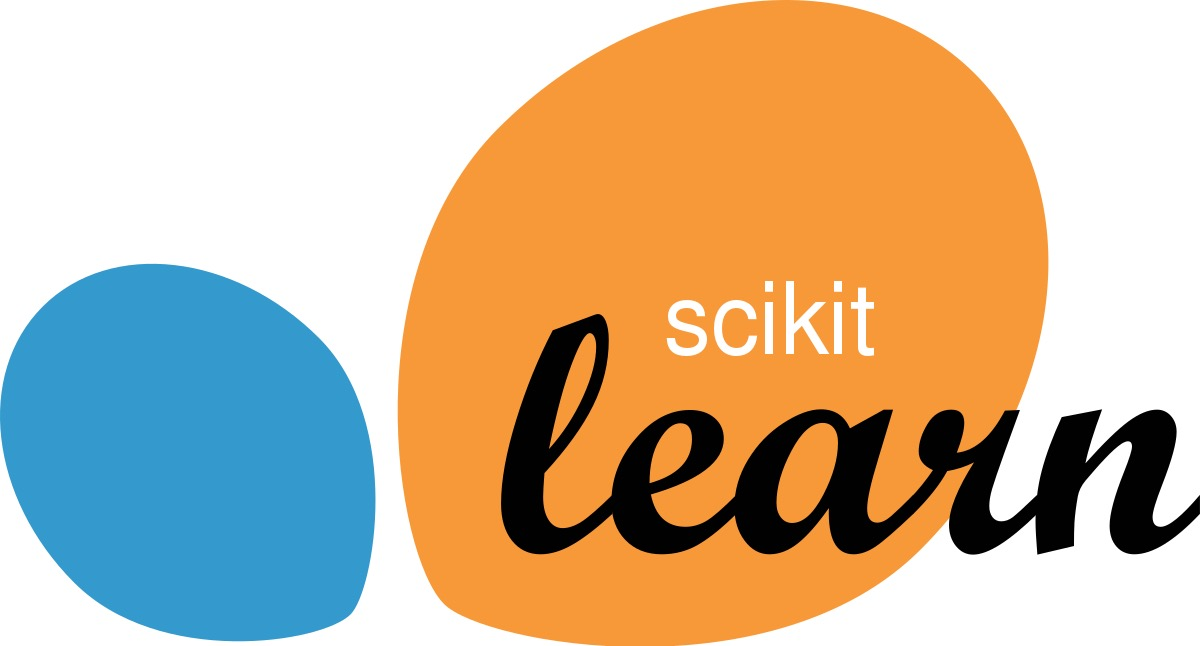

## sklearn (Scikit-Learn) 是基于 Python 语言的机器学习工具

- 简单高效的数据挖掘和数据分析工具
- 可在各种环境中重复使用
- 建立在 NumPy ，SciPy 和 matplotlib 上
- 开源，可商业使用 - BSD许可证

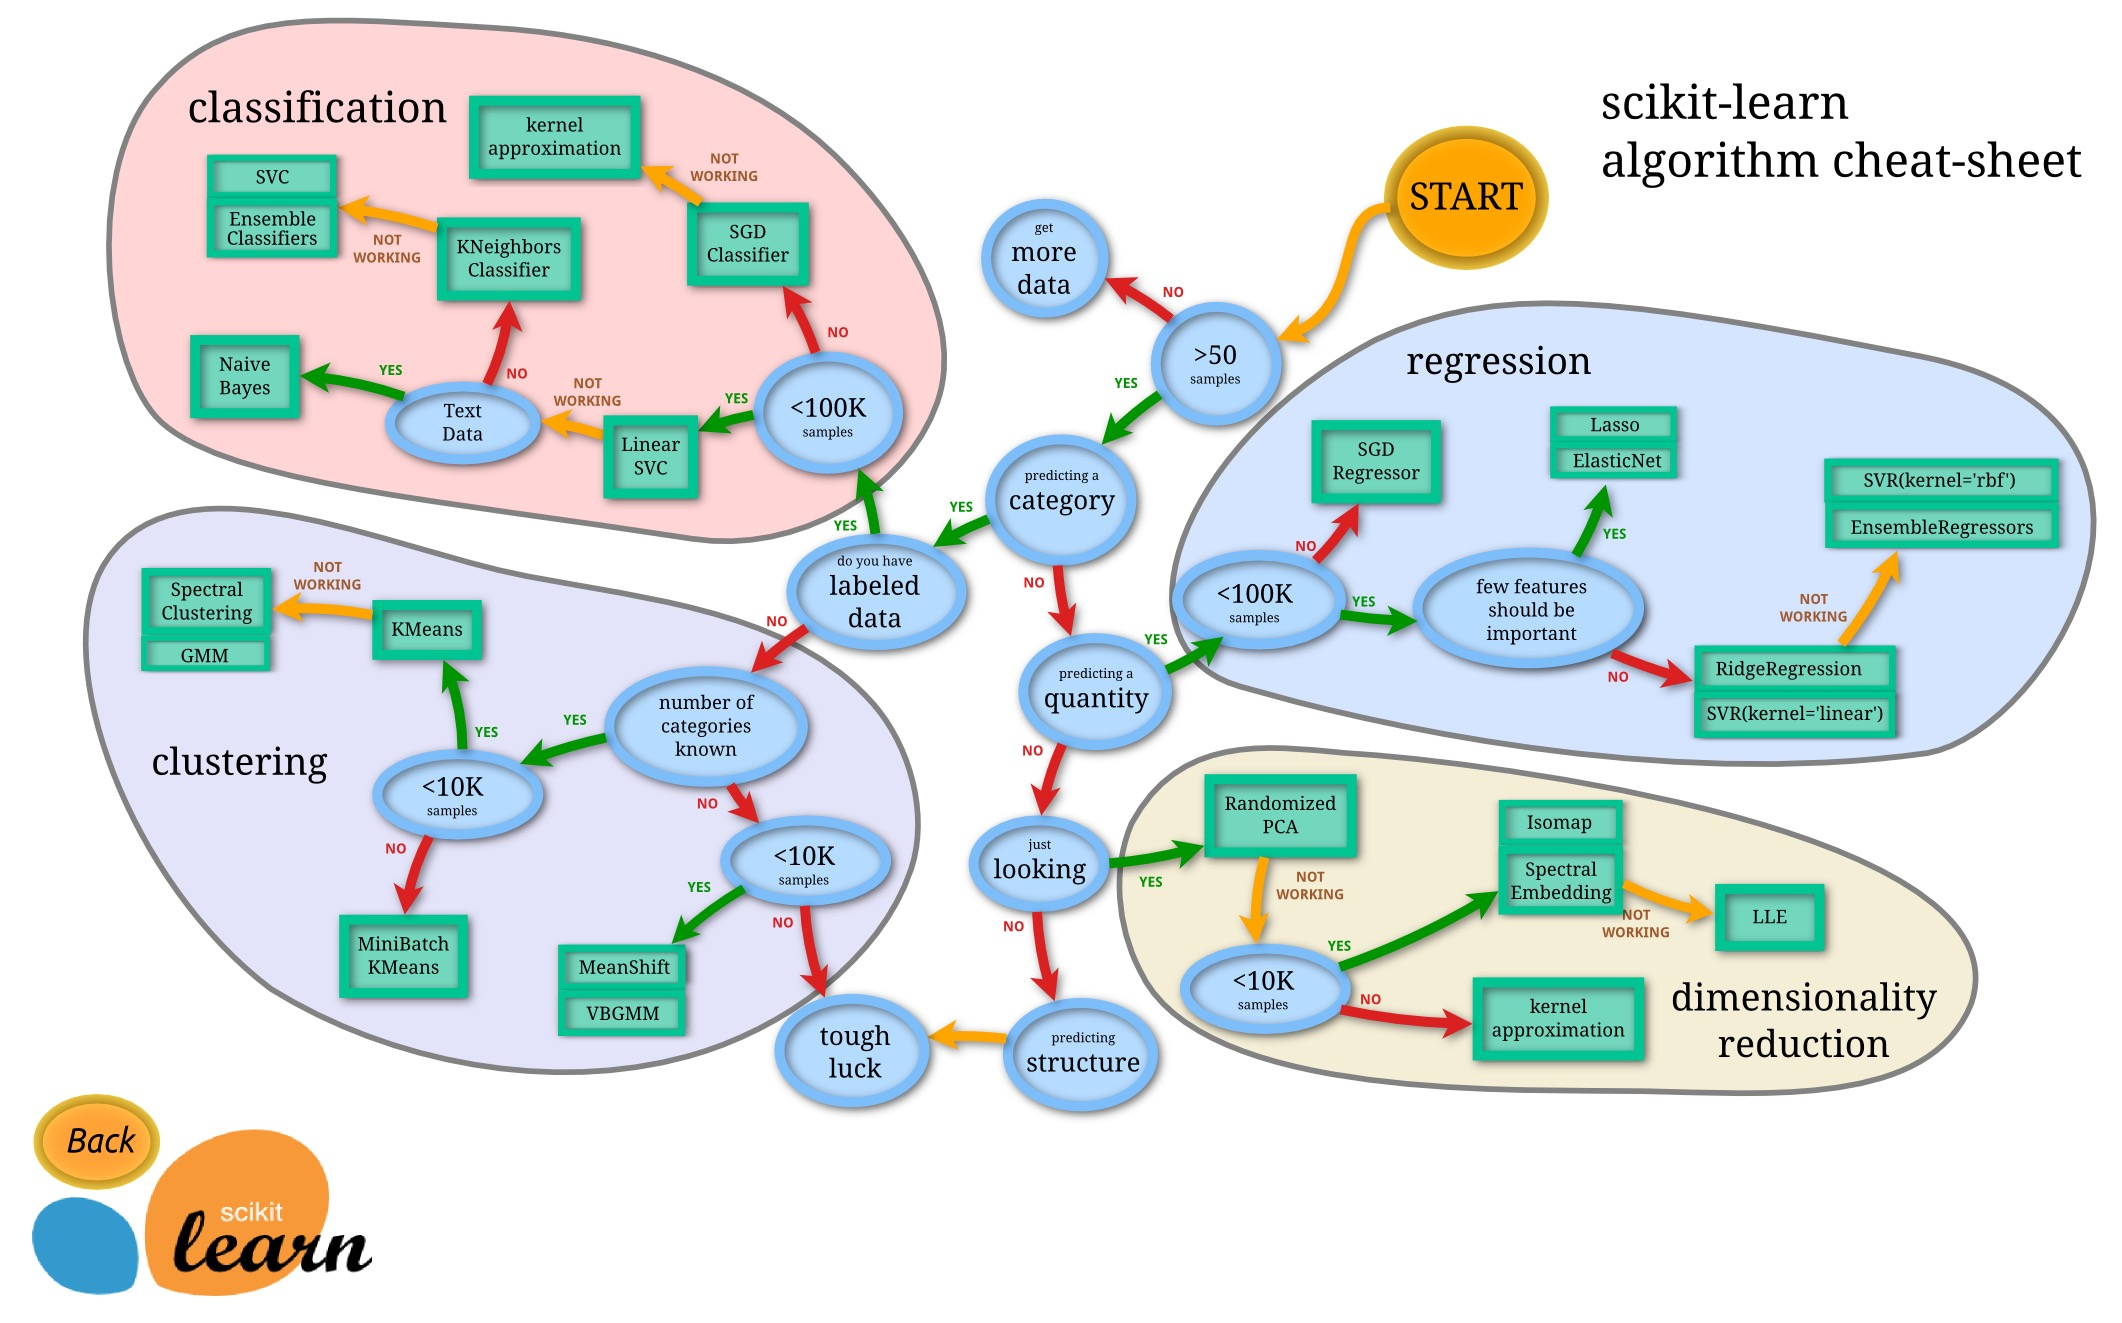

# 数据的表示和可视化

机器学习，是模型对数据的**拟合**(fit)；所以，我们将从讨论如何表示数据，方便计算机"理解"开始。通过可视化，可以让我们更好地理解数据，也更好的理解所要处理的问题。

## scikit-learn中的数据

scikit-learn里用的数据, 除了极少数的例外，都假定存储格式为**二维数组(two-dimensional array)**, 形状是`[n_samples, n_features]`. 很多算法也接受相同形状的``scipy.sparse``矩阵.

- **n_samples:**   样本数:每个样本，都是要处理(如分类)的实例。样本可以是文档、图片、声音、视频、天文目标，数据库或CSV文件中的一行，或任何你能用一组固定数值型的特质描述的东西。
- **n_features:**  特征数，可以用来定量描述每个实例的特征或特质的数量。特征通常是实数的，但某些情况下可能是布尔值或离散值。

特征数必须事先确定。可能是非常高维的(如上百万个特征)，对于给定样本，它们中的大多数是“零”。这种情况下`scipy.sparse`矩阵可能很有用，会比NumPy数组内存使用上更有效率。

正如之前提到过的，我们将样本(数据点或实例)表示为数据数组中的行，将相应的特征“维(dimensions)”存储为列。

### 简单例子: 鸢尾花(Iris)数据集

作为简单数据集的例子，来看看scikit-learn内置的鸢尾花数据。这些数据包括三种不同鸢尾花的测量值。在这个特定的数据集中有三种不同的鸢尾花，如下图所示:

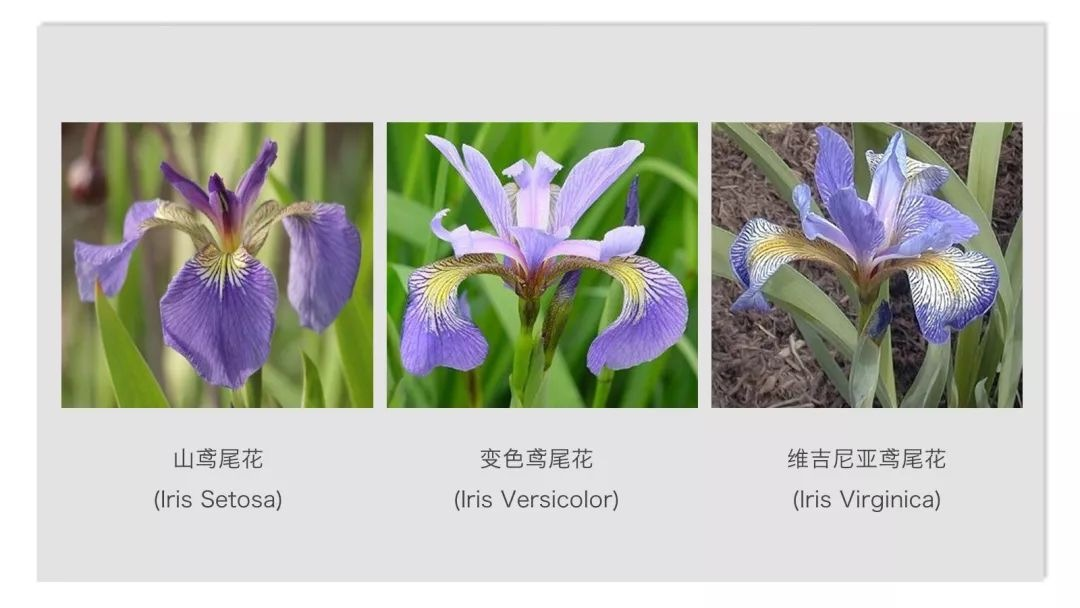

### 请问:

**假设我们对新观察的分类感兴趣；想预测未知的花是山鸢尾花(Iris-Setosa)、变色鸢尾花(Iris-Versicolor)，还是维吉尼亚鸢尾花(Iris-Virginica)。基于我们在之前讨论的内容，该如何构建这样一个数据集？**

我们需要的是一个形状为`[n_samples x n_features]`的二维数组.

- `n_samples`指的是什么?

- `n_features`指的又是什么?

记住，每个样本特征数量肯定是**固定**的, 每个样本的特征数 *j* 必须是相似的数值。

### 用Scikit-learn加载Iris数据

为方便继续开展机器学习算法实验，建议收藏[UCI machine learning repository](http://archive.ics.uci.edu/ml/)，这个知识库包含许多常用数据集，对于机器学习算法的基准测试非常有用，是深受机器学习实践者和研究人员欢迎的好资源。很方便的一点是，其中一些数据集已经包含在scikit-learn中，可以跳过下载、读取、解析、清理这些文本/CSV文件的繁琐步骤。scikit-learn可用数据集的列表，可以在这里查看:http://scikit-learn.org/stable/datasets/#toy-datasets.

例如，scikit-learn有一套关于鸢尾花的非常简单的数据，包括以下内容:

- Iris数据集包含的特征:
  1. 花萼长度(sepal length) in cm
  2. 花萼宽度(sepal width) in cm
  3. 花瓣长度(petal length) in cm
  4. 花瓣宽度(petal width) in cm


- 要预测的目标类:
  1. 山鸢尾花(Iris Setosa)
  2. 变色鸢尾花(Iris Versicolor)
  3. 维吉尼亚鸢尾花(Iris Virginica)

<img src="figures/petal_sepal.jpg" alt="Sepal" style="width: 50%;"/>

``scikit-learn``内置了iris CSV文件副本，以及将数据加载成numpy数组的辅助函数:

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()

加载结果iris是一个``Bunch``对象:可以用``keys()``方法看看有哪些东西可用:

In [ ]:
iris.keys()

每朵花样本的特征，都存在数据集的``data``属性中:

In [ ]:
n_samples, n_features = iris.data.shape
print('Number of samples:', n_samples)
print('Number of features:', n_features)
# the sepal length, sepal width, petal length and petal width of the first sample (first flower)
print(iris.data[0])

每朵花样本的类别信息(目标)，存在数据集的``target``属性中:

In [ ]:
print(iris.data.shape)
print(iris.target.shape)

In [ ]:
print(iris.target)

In [ ]:
import numpy as np

np.bincount(iris.target)

用NumPy的bincount函数，可以看到在这个数据集中各类是均匀分布的——每个品种有50朵花样本，其中

- class 0: 山鸢尾花(Iris-Setosa)
- class 1: 变色鸢尾花(Iris-Versicolor)
- class 2: 维吉尼亚鸢尾花(Iris-Virginica)

这些类名存储在最后一个属性中，即``target_names``:

In [ ]:
print(iris.target_names)

数据是四维的，但我们可以用简单的直方图或散点图，一次可视化其中的一两维。

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
x_index = 3
colors = ['blue', 'red', 'green']

for label, color in zip(range(len(iris.target_names)), colors):
    plt.hist(iris.data[iris.target==label, x_index], 
             label=iris.target_names[label],
             color=color)

plt.xlabel(iris.feature_names[x_index])
plt.legend(loc='upper right')
plt.show()

In [ ]:
x_index = 3
y_index = 0

colors = ['blue', 'red', 'green']

for label, color in zip(range(len(iris.target_names)), colors):
    plt.scatter(iris.data[iris.target==label, x_index], 
                iris.data[iris.target==label, y_index],
                label=iris.target_names[label],
                c=color)

plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.legend(loc='upper left')
plt.show()

### 练习:

**试一试** `x_index` **和** `y_index` **两个参数的其他组合，最大限度地将三个类分开.**

### 延伸: 散点图矩阵

分析师一般不会一个图一个图的看，而是常用一种叫做**散点图矩阵**的工具。

散点图矩阵显示数据集中所有特征两两之间的散点图，直方图显示每个特征各自的分布。

In [ ]:
import pandas as pd
    
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
pd.plotting.scatter_matrix(iris_df, figsize=(8, 8));

## 其他可用数据

[Scikit-learn提供了大量用于测试学习算法的数据集](http://scikit-learn.org/stable/datasets/#dataset-loading-utilities).

分三种类型:

- **打包数据(Packaged Data):** 这些小数据集随scikit-learn一起打包安装，可以用``sklearn.datasets.load_*``进行加载
- **可下载数据(Downloadable Data):** 这些较大的数据集可以下载，scikit-learn带有简化这一过程的工具：``sklearn.datasets.fetch_*``
- **生成数据(Generated Data:** 有些数据集是用基于随机种子模型生成的，具体参见：``sklearn.datasets.make_*``

可以用IPython的Tab键自动补全来探索可用的数据集加载器、提取器和生成器。

输入

    datasets.load_<TAB>

或

    datasets.fetch_<TAB>

或

    datasets.make_<TAB>

查看可用的函数列表。

In [ ]:
from sklearn import datasets

用``fetch_``脚本下载的数据，会存储在本地，在你的home主目录的子目录下。

可以用如下方法来确定它的位置：

In [ ]:
from sklearn.datasets import get_data_home
get_data_home()

注意:这些数据集，有的非常大，下载可能需要很长时间！

如果在IPython notebook里开始下载，想要终止它，可以用ipython的“中断内核(interrupt kernel)”功能，在菜单里就能找到，或者直接用快捷键``Ctrl-m i``。

可以按``Ctrl-m h``来查看所有``ipython``键盘快捷键的列表。

## 加载数字(Digits)数据

来看看另一个数据集，需要稍微多花点心思进行表示的数据集。可以用与之前类似的方式:

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

In [ ]:
digits.keys()

In [ ]:
n_samples, n_features = digits.data.shape
print((n_samples, n_features))

In [ ]:
print(digits.data[0])
print(digits.target)

这里的目标，只是data所代表的数字，而data是长度为64的数组...表示什么意思呢？

实际上，我们有两个版本的数据数组:
``data`` 和 ``images``。具体看一看:

In [ ]:
print(digits.data.shape)
print(digits.images.shape)

可以看到它们通过一个简单的reshape联系在一起:

In [ ]:
import numpy as np
print(np.all(digits.images.reshape((1797, 64)) == digits.data))

再把数据可视化看一下。比之前的简单散点图要复杂一些，但很快就能完成。

In [ ]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

现在我们知道这些特征是什么意思了。每个特征代表手写数字的8×8图像中像素的灰度。

虽然每个样本数据都是而二维的，数据矩阵会把它压平成为一个**单个矢量**，以便包含在数据矩阵的**一行**里。

## 生成数据: S曲线(S-Curve)

一个常用作简单非线性数据集示例的数据集是S曲线:

In [ ]:
from sklearn.datasets import make_s_curve
data, colors = make_s_curve(n_samples=1000)
print(data.shape)
print(colors.shape)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=colors)
ax.view_init(10, -60)

这个例子通常与一种称为局部线性嵌入(LocallyLinear Embedding)的无监督学习方法一起使用。本教程后面会详细介绍无监督学习。

## 练习: 试试faces数据集

花点时间，自己探索一下数据集。
花一点时间获取数据(大约1.4MB)，并对人脸可视化。
可以复制以上用于可视化手写数字的代码，并针对此数据进行修改。

In [ ]:
from sklearn.datasets import fetch_olivetti_faces

In [ ]:
# fetch the faces data


In [ ]:
# Use a script like above to plot the faces image data.
# hint: plt.cm.bone is a good colormap for this data


### Solution:

In [ ]:
# %load solutions/03A_faces_plot.py